<a href="https://colab.research.google.com/github/edwardb1203/GoogleSunroofML/blob/main/GoogleSunroofML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
# Understanding results
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# Ridge penalties
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
# Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [124]:
# Initializing empty lists to store model accuarcy and name for later comparison
accuracy = []
model = []

# Exploring and cleaning our data

In [125]:
# We are using the Google Sunroof data set taken from Kaggle
url = 'https://raw.githubusercontent.com/edwardb1203/GoogleSunroofML/main/sunroof_solar_potential_by_censustract.csv'
# url_city_data = 'https://raw.githubusercontent.com/edwardb1203/GoogleSunroofML/main/project-sunroof-city-09082017.csv'
df=pd.read_csv(url)
# Let's take a look at the data
df.head()

,carbon_offset_metric_tons,count_qualified,existing_installs_count,install_size_kw_buckets,kw_median,kw_total,lat_avg,lat_max,lat_min,lng_avg,...,region_name,state_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w
0,2159.887389,586,12,[[0171][5231][10114][1545][2016][252][352][451...,7.25,5219.00,34.267040,34.272362,34.261761,-118.432716,...,6037104401,California,1.014756e+06,2.539152e+06,1285.247909,10863.017950,1.075291e+06,1.760043e+06,7.922383e+06,1.533140e+06
1,11392.316227,369,4,[[060][550][1024][1518][2023][2515][3012][3515...,28.00,28391.25,43.156368,43.162289,43.150970,-77.607040,...,36055009400,New York,7.338827e+05,2.815855e+07,947.750000,30689.598633,1.739810e+05,1.342966e+06,3.117606e+07,7.666855e+05
2,6902.286133,788,3,[[0364][5313][1057][1513][207][258][305][351][...,5.25,7352.25,42.277794,42.288818,42.266918,-89.066589,...,17201000700,Illinois,1.024630e+06,2.850205e+06,980.050000,5823.500452,1.342642e+05,3.155397e+06,8.337565e+06,1.173068e+06
3,3238.933474,432,1,[[0320][567][1020][1512][251][302][351][401][4...,3.25,3598.25,40.422962,40.428940,40.418259,-79.993729,...,42003180300,Pennsylvania,1.203715e+06,1.432569e+06,948.600000,3724.817041,7.318190e+04,7.604248e+05,3.912445e+06,4.425539e+05
4,6111.873688,827,32,[[0125][5219][10227][15124][2039][2520][3015][...,11.50,15098.50,33.844044,33.847179,33.839771,-117.933113,...,6059086602,California,2.070519e+06,1.183461e+07,1260.550000,16996.447681,1.691435e+06,3.551939e+06,2.241812e+07,3.269615e+06


In [126]:
df.describe()

,carbon_offset_metric_tons,count_qualified,existing_installs_count,kw_median,kw_total,lat_avg,lat_max,lat_min,lng_avg,lng_max,...,percent_qualified,region_name,yearly_sunlight_kwh_e,yearly_sunlight_kwh_f,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_median,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_total,yearly_sunlight_kwh_w
count,48722.000000,48722.000000,48722.000000,48664.000000,48664.000000,48722.000000,48722.000000,48722.000000,48722.000000,48722.000000,...,48722.000000,4.872200e+04,4.872200e+04,4.872200e+04,48721.000000,4.866400e+04,4.872200e+04,4.872200e+04,4.866400e+04,4.872200e+04
mean,11743.750532,955.748840,13.809203,10.288987,17120.909466,37.457266,37.473969,37.440494,-93.012390,-92.990561,...,77.411231,2.667656e+10,2.756762e+06,1.026128e+07,1092.248343,1.325723e+04,1.127443e+06,4.693428e+06,2.234360e+07,3.478096e+06
std,12457.365528,709.308009,36.795430,19.902333,16630.081810,5.070044,5.069354,5.070830,17.128056,17.127137,...,15.712845,1.619133e+10,2.894289e+06,1.649937e+07,133.631305,2.560913e+04,1.463548e+06,4.546479e+06,2.262537e+07,3.620384e+06
min,0.000000,0.000000,0.000000,2.000000,2.000000,19.560486,19.602310,19.406630,-158.124237,-158.113037,...,0.000000,1.001020e+09,0.000000e+00,0.000000e+00,727.909091,1.979426e+03,0.000000e+00,0.000000e+00,2.178341e+03,0.000000e+00
25%,4097.426913,455.000000,0.000000,6.000000,6787.375000,33.838716,33.853292,33.824902,-106.347076,-106.326199,...,67.958288,1.203102e+10,8.217493e+05,2.574992e+06,989.400000,7.198405e+03,1.690452e+05,1.651416e+06,8.361908e+06,1.057562e+06
50%,8215.046881,841.000000,2.000000,8.000000,13230.625000,38.442801,38.465385,38.421844,-87.684162,-87.675159,...,79.803761,2.616350e+10,1.990558e+06,5.654003e+06,1070.150000,1.007060e+04,6.111209e+05,3.567568e+06,1.686481e+07,2.539494e+06
75%,15245.210049,1305.000000,9.000000,10.750000,22290.687500,41.189430,41.205283,41.175228,-80.181004,-80.167238,...,89.855072,4.010911e+10,3.746513e+06,1.193314e+07,1176.400000,1.436447e+04,1.540125e+06,6.373550e+06,2.916793e+07,4.720183e+06
max,347200.877549,17177.000000,847.000000,1000.000000,386462.500000,64.988930,65.454468,64.848373,-68.268173,-68.154678,...,100.000000,5.603997e+10,6.395091e+07,5.196147e+08,1448.400000,1.361346e+06,3.071430e+07,9.074464e+07,5.339304e+08,6.821920e+07


The columns we want to consider are: 
<br> yearly_sunlight_kwh_kw_threshold_avg
<br>yearly_sunlight_kwh_f
<br>yearly_sunlight_kwh_n
<br>yearly_sunlight_kwh_s
<br>yearly_sunlight_kwh_e
<br>yearly_sunlight_kwh_w
<br>number_of_panels_f
<br>number_of_panels_n
<br>number_of_panels_s
<br>number_of_panels_e
<br>number_of_panels_w
<br>lat_avg 
<br> lng_avg
<br>kw_total

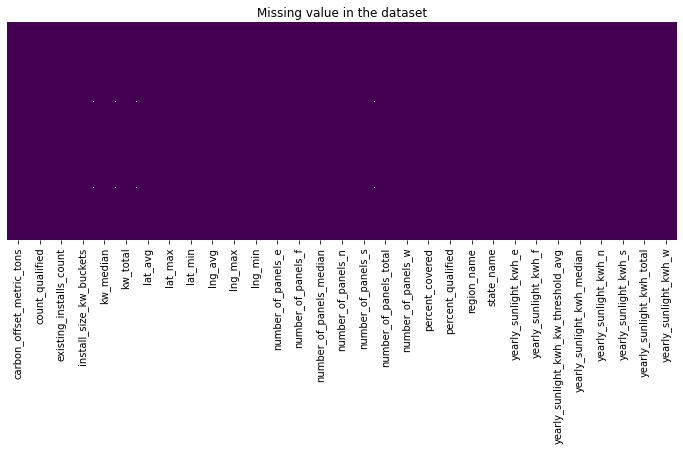

In [127]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

It looks like there are a few missing values

In [128]:
# Let's clean our data
# A function to determine location and amount of missing values
def missing_value(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    q = list(percent_missing)
    missing_value_df = pd.DataFrame({'Column Name': df.columns, 'Percent Missing % ': q})
    # I only want to see the missing values
    return missing_value_df.loc[missing_value_df['Percent Missing % '] > 0]

In [129]:
# Let's take a look
missing_value(df)

,Column Name,Percent Missing %
3,install_size_kw_buckets,0.119043
4,kw_median,0.119043
5,kw_total,0.119043
14,number_of_panels_median,0.119043
17,number_of_panels_total,0.119043
22,state_name,0.002052
25,yearly_sunlight_kwh_kw_threshold_avg,0.002052
26,yearly_sunlight_kwh_median,0.119043
29,yearly_sunlight_kwh_total,0.119043


In [130]:
# The only column we want that is missing values is yearly_sunlight_kwh_kw_threshold_avg, with 0.002052% of values missing
# Let's drop them
desired_columns = ['carbon_offset_metric_tons','yearly_sunlight_kwh_kw_threshold_avg', 'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s', 'yearly_sunlight_kwh_e','yearly_sunlight_kwh_w','number_of_panels_f','number_of_panels_n','number_of_panels_s','number_of_panels_e','number_of_panels_w','lat_avg','lng_avg','kw_total']
# dropna removes cols w/ missing vals
df = df.dropna(subset=['yearly_sunlight_kwh_kw_threshold_avg'])
df = df[desired_columns]
df.head()

,carbon_offset_metric_tons,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_f,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,number_of_panels_f,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,lat_avg,lng_avg,kw_total
0,2159.887389,1285.247909,2.539152e+06,1.075291e+06,1.760043e+06,1.014756e+06,1.533140e+06,6574,3159,4352,2964,3827,34.267040,-118.432716,5219.00
1,11392.316227,947.750000,2.815855e+07,1.739810e+05,1.342966e+06,7.338827e+05,7.666855e+05,102635,693,4578,2760,2899,43.156368,-77.607040,28391.25
2,6902.286133,980.050000,2.850205e+06,1.342642e+05,3.155397e+06,1.024630e+06,1.173068e+06,9963,535,10649,3841,4421,42.277794,-89.066589,7352.25
3,3238.933474,948.600000,1.432569e+06,7.318190e+04,7.604248e+05,1.203715e+06,4.425539e+05,5001,299,2529,4920,1644,40.422962,-79.993729,3598.25
4,6111.873688,1260.550000,1.183461e+07,1.691435e+06,3.551939e+06,2.070519e+06,3.269615e+06,31555,5146,8933,5933,8827,33.844044,-117.933113,15098.50


We need to store the carbon score for classifcation problems later before we normalize

carbon_offset_metric_tons


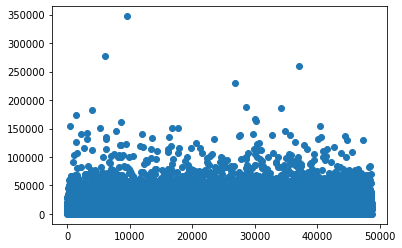

yearly_sunlight_kwh_kw_threshold_avg


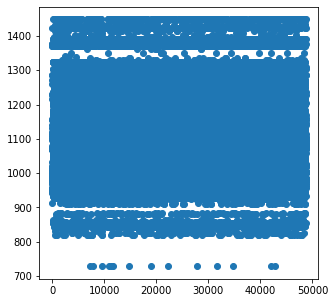

yearly_sunlight_kwh_f


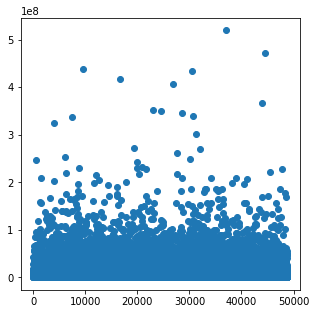

yearly_sunlight_kwh_n


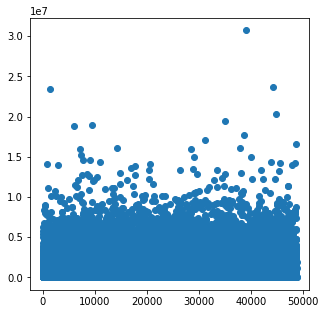

yearly_sunlight_kwh_s


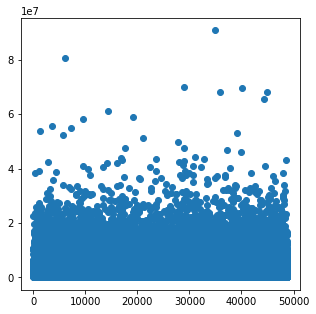

yearly_sunlight_kwh_e


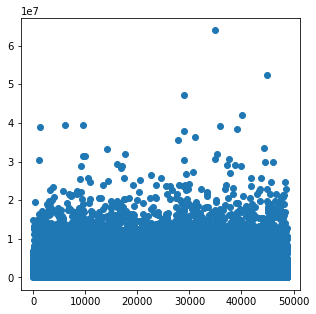

yearly_sunlight_kwh_w


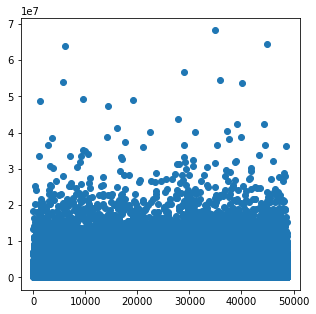

number_of_panels_f


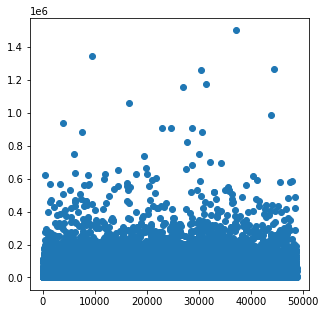

number_of_panels_n


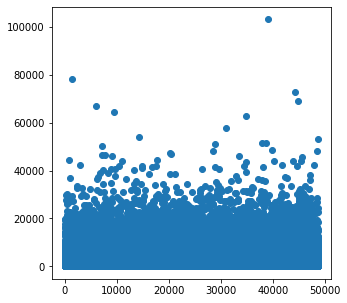

number_of_panels_s


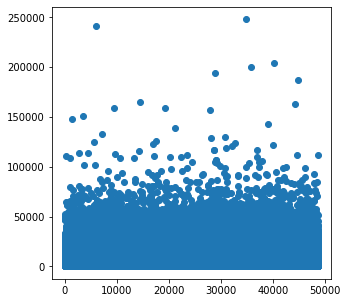

number_of_panels_e


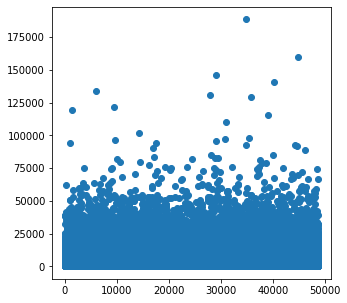

number_of_panels_w


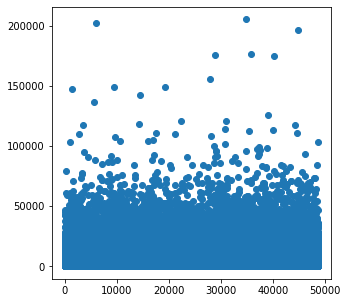

lat_avg


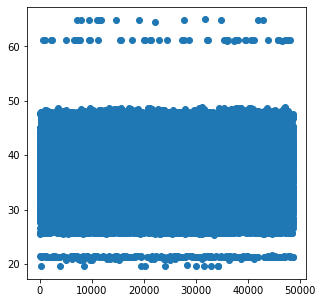

lng_avg


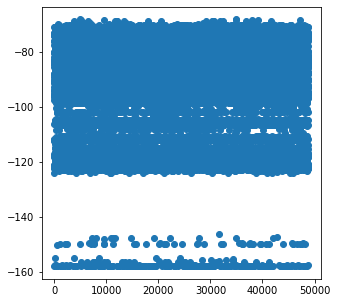

kw_total


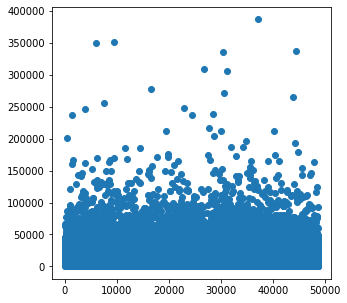

In [131]:
for col in desired_columns:
  print(col)
  x = range(len(df[col]))
  y = df[col] 
  plt.scatter(x, y)
  plt.show()
  plt.rcParams["figure.figsize"] = (5,5)

Now we need to normalize our data. We can use simple min-max normalization.

In [133]:
# Normalize using Min/Max Normalization.
normalized_df = (df-df.min())/(df.max()-df.min())
df = normalized_df
df.head()

,carbon_offset_metric_tons,yearly_sunlight_kwh_kw_threshold_avg,yearly_sunlight_kwh_f,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,number_of_panels_f,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,lat_avg,lng_avg,kw_total
0,0.006221,0.773554,0.004887,0.035009,0.019396,0.015868,0.022474,0.004375,0.030657,0.017545,0.015731,0.018634,0.323730,0.441723,0.013499
1,0.032812,0.305127,0.054191,0.005664,0.014799,0.011476,0.011239,0.068301,0.006725,0.018456,0.014649,0.014116,0.519408,0.896069,0.073460
2,0.019880,0.349957,0.005485,0.004371,0.034772,0.016022,0.017196,0.006630,0.005192,0.042932,0.020386,0.021527,0.500068,0.768536,0.019019
3,0.009329,0.306306,0.002757,0.002383,0.008380,0.018822,0.006487,0.003328,0.002902,0.010196,0.026113,0.008005,0.459238,0.869507,0.009306
4,0.017603,0.739275,0.022776,0.055070,0.039142,0.032377,0.047928,0.020999,0.049940,0.036014,0.031489,0.042980,0.314419,0.447283,0.039064


In [134]:
# Was getting an error when running regression that there were NaN or infinite values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [135]:
df = clean_dataset(df)

In [143]:
carbon_scores = []
carbon_offset_range = (max(df['carbon_offset_metric_tons']) - min(df['carbon_offset_metric_tons']))
carbon_offset_min = min(df['carbon_offset_metric_tons'])

for carbon_offset_metric_tons in df['carbon_offset_metric_tons']:
  next_score = (carbon_offset_metric_tons - carbon_offset_min) / carbon_offset_range
  next_score = np.ceil(next_score * 5)
  if(next_score == 0): next_score = 1
  carbon_scores.append(next_score)

# Linear Regression using scikit

In [136]:
# Splitting features and labels
features = df[desired_columns]
target = df['carbon_offset_metric_tons']
# Splitting train and test data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.25,random_state = 1)

In [137]:
# Regression Model
linear_regression_model = LinearRegression()
# Training
linear_regression_model.fit(Xtrain,Ytrain)

LinearRegression()

In [138]:
# How does the model do?
# r_sq is a number between 0 and 1 that measures how well a statistical model predicts an outcome
r_sq = linear_regression_model.score(Xtrain, Ytrain)
# Saving our results
accuracy.append(r_sq)
model.append('Linear Regression')
print(f"coefficient of determination: {r_sq*100}")

coefficient of determination: 100.0


An R^2 of 1 indicates that the regression predictions perfectly fit the data.

In [139]:
# Test model
carbon_offset = linear_regression_model.predict(Xtest)
print(f"predicted response:\n{carbon_offset}")

predicted response:
[0.03685395 0.10368538 0.04007617 ... 0.03537786 0.11350945 0.01141601]


# Ridge Regression


In [161]:
# L2 ridge regression
rr = Ridge(alpha=0.01) # Alpha of 0.01
rr.fit(Xtrain, Ytrain) 

pred_test_rr = rr.predict(Xtest)
print(np.sqrt(mean_squared_error(Ytest,pred_test_rr))) 
print(r2_score(Ytest, pred_test_rr))
accuracy.append(r2_score(Ytest, pred_test_rr))
model.append('Ridge Regression')


0.07392696411701292
0.3570918581889091


In [141]:
# # L1 Lasso regression
# model_lasso = Lasso(alpha=0.01) # Alpha of 0.01
# model_lasso.fit(Xtrain, Ytrain) 
# pred_train_lasso = model_lasso.predict(Xtrain)
# print(np.sqrt(mean_squared_error(Ytrain,pred_train_lasso)))
# print(r2_score(Ytrain, pred_train_lasso))

# pred_test_lasso= model_lasso.predict(Xtest)
# print(np.sqrt(mean_squared_error(Ytest,pred_test_lasso))) 
# print(r2_score(Ytest, pred_test_lasso))

0.035764398980669417
0.0
0.036230533648961914
-8.21421902947872e-05


# Preparing our model for classification algorithms

In [144]:
# adding a carbon score column to our data
df.insert(1, "carbon_score", carbon_scores, True)

In [145]:
# Splitting our features and targets
features = df[desired_columns]
target = df['carbon_score']

In [146]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.25,random_state = 1)

# Decision Trees


In [147]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
score = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(score)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", score*100)

DecisionTrees's Accuracy is:  99.9917803715272


In [148]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# SVM


In [149]:
SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

score = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(score)
model.append('SVM')
print("SVM's Accuracy is: ", score*100)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  99.44928489232286
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12091
         2.0       0.50      0.12      0.19        67
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         1

    accuracy                           0.99     12166
   macro avg       0.37      0.28      0.30     12166
weighted avg       0.99      0.99      0.99     12166



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [150]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Logistic Regression

In [151]:
LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

score = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(score)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", score*100)

print(classification_report(Ytest,predicted_values))


Logistic Regression's Accuracy is:  99.58079894788754
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12091
         2.0       0.67      0.48      0.56        67
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00     12166
   macro avg       0.42      0.37      0.39     12166
weighted avg       0.99      1.00      1.00     12166



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [152]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Random Forest


In [153]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

score = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(score)
model.append('RF')
print("RF's Accuracy is: ", score*100)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  99.94246260069045
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00     12091
         2.0       0.94      0.97      0.96        67
         3.0       0.75      0.43      0.55         7
         4.0       0.00      0.00      0.00         1

    accuracy                           1.00     12166
   macro avg       0.67      0.60      0.63     12166
weighted avg       1.00      1.00      1.00     12166



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Comparison between models


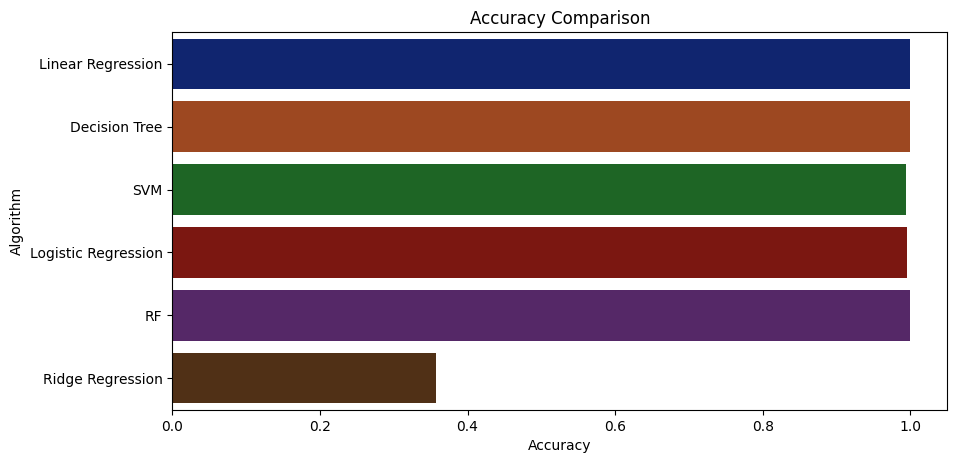

In [162]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = model,palette='dark')

In [163]:
accuracy_models = dict(zip(model, accuracy))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Linear Regression --> 1.0
Decision Tree --> 0.9999178037152721
SVM --> 0.9944928489232286
Logistic Regression --> 0.9958079894788755
RF --> 0.9994246260069045
Ridge Regression --> 0.3570918581889091


# ToDo

Add penalties to classification models, Add confusion matrices, remove outliers in data set (rerun) document this, find some way to show correlation (or lack thereof) for features